In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data= ('/content/drive/MyDrive/Python/Bank_Churn_Modelling.csv')

In [3]:
df= pd.read_csv(data)
df.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6409,6410,15690695,Flynn,683,France,Female,33,9,0.0,2,1,1,38784.42,0
4471,4472,15642824,Onyekaozulu,826,Spain,Female,56,8,174506.1,2,0,1,161802.82,1
5392,5393,15710012,Bowen,738,Spain,Male,44,2,0.0,2,1,0,43018.82,1
3925,3926,15701206,Torreggiani,566,Spain,Male,44,5,0.0,2,1,0,66462.79,0


In [4]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Dropping RowNumber and CustomerID- unnecessary columns for ANN

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) #if u run the code more than once it will show an error
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4693,543,France,Female,32,7,147256.86,1,1,0,112771.95,0
4792,756,Spain,Male,19,4,130274.22,1,1,1,133535.29,0
8301,615,Germany,Male,58,3,72309.30,1,1,1,85687.09,1
2713,763,Spain,Male,67,9,148564.66,1,0,1,87236.40,0


In [6]:
# Listing out the unique values for each column in the dataset
for i in df.columns:
    print(f'{i}: {df[i].unique()}')


CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [7]:
# Check for null values in the DataFrame
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Plotting histogram

Plotting histogram for credit Scoring

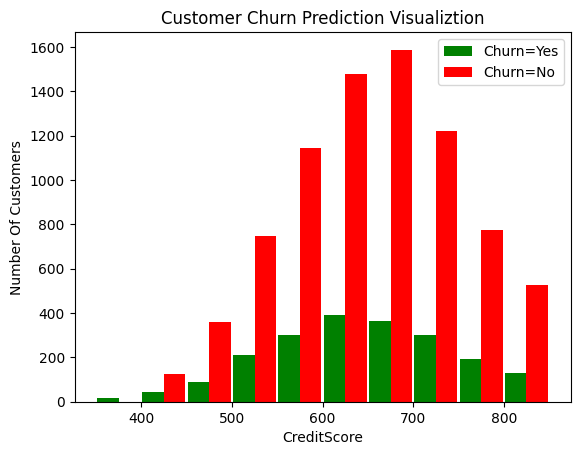

In [8]:
df1= df
cc_exited_yes= df1[df1.Exited== 1]. CreditScore #assuming 1 represents yes
cc_exited_no= df1[df1.Exited== 0]. CreditScore  #assuming 0 represents no
# Since 1 and 0 are integers no inveerted comma is required near it

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([cc_exited_yes, cc_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Plotting histogram for age

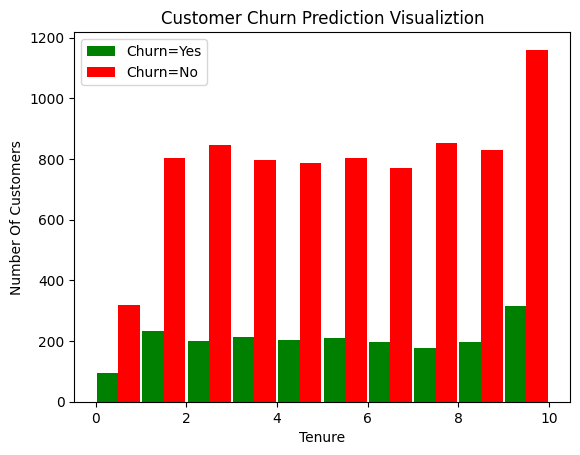

In [9]:
tenure_exited_yes= df1[df1.Exited== 1]. Tenure  #assuming 1 represents yes
tenure_exited_no= df1[df1.Exited== 0]. Tenure  #assuming 0 represents no
# Since 1 and 0 are integers no inveerted comma is required near it

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Plotting histogram for tenure

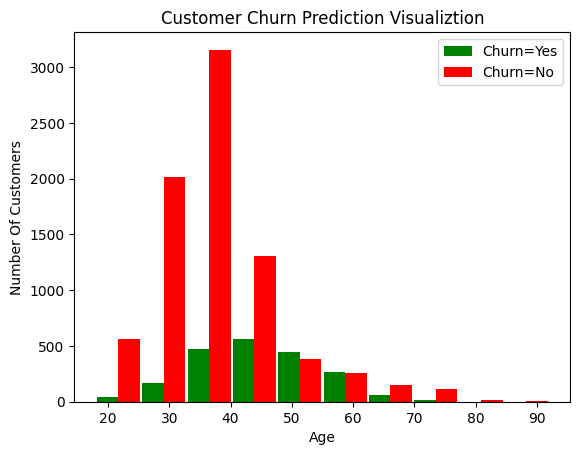

In [10]:
age_exited_yes= df1[df1.Exited== 1]. Age #assuming 1 represents yes
age_exited_no= df1[df1.Exited== 0]. Age  #assuming 0 represents no
# Since 1 and 0 are integers no inveerted comma is required near it

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([age_exited_yes, age_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Plotting histogram for estimated salary

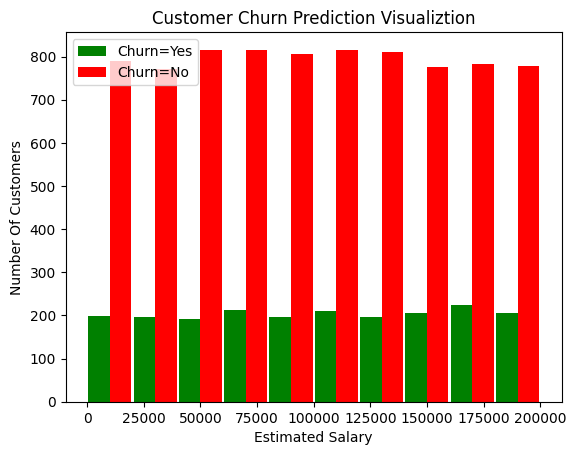

In [11]:
es_exited_yes= df1[df1.Exited== 1]. EstimatedSalary #assuming 1 represents yes
es_exited_no= df1[df1.Exited== 0]. EstimatedSalary  #assuming 0 represents no
# Since 1 and 0 are integers no inveerted comma is required near it

plt.xlabel("Estimated Salary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([es_exited_yes, es_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Data Cleaning

In [12]:
df1.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [13]:
# printing unique col values for object datatype
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [14]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


One-hot encoding for categorical columns- Geography

In [15]:
# Applying one hot encoding to geography column
df2 = pd.get_dummies(data=df1, columns=['Geography','Gender'])
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

Converting the Gender column into 1's and 0's (1- female; 0- Male)

In [16]:
#df2['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [17]:
df2.sample(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9795,506,43,2,0.00,2,1,0,105568.60,0,True,False,False,False,True
2274,580,65,9,106804.26,3,1,0,107890.69,1,True,False,False,True,False
473,785,28,8,0.00,2,1,0,77231.27,0,True,False,False,False,True
1722,595,30,5,100683.54,1,1,1,178361.04,0,False,False,True,True,False


Applying min_max scaler for continous numerical data types

In [18]:
cols_to_scale = ['Tenure', 'Balance', 'EstimatedSalary','Age','CreditScore','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

Train_test split

In [19]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:
X_train.shape

(8000, 13)

In [21]:
X_test.shape

(2000, 13)

In [22]:
X_train[:10]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7751,0.800,0.283784,0.6,0.000000,0.333333,0,0,0.096273,False,False,True,True,False
4154,0.752,0.216216,0.3,0.000000,0.333333,1,0,0.981478,True,False,False,False,True
3881,0.476,0.621622,0.3,0.000000,0.000000,1,1,0.948551,True,False,False,True,False
9238,0.846,0.432432,0.4,0.000000,0.333333,1,0,0.646869,True,False,False,True,False
5210,0.402,0.229730,0.7,0.517012,0.333333,0,0,0.434670,True,False,False,False,True
7487,0.602,0.513514,0.4,0.000000,0.000000,0,0,0.421898,True,False,False,True,False
7542,0.314,0.216216,0.4,0.000000,0.333333,1,1,0.303413,False,False,True,True,False
7524,0.620,0.297297,0.8,0.666330,0.000000,1,1,0.925815,True,False,False,True,False
9412,0.750,0.108108,0.6,0.393324,0.000000,0,0,0.668609,True,False,False,False,True
6377,0.684,0.202703,0.9,0.000000,0.000000,1,0,0.567526,True,False,False,False,True


In [23]:
len(X_train.columns)

13

In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4163 - loss: 0.7548
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7946 - loss: 0.4986
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8041 - loss: 0.4615
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4677
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8066 - loss: 0.4523
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8038 - loss: 0.4503
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.4369
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.4420
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8183 - loss: 0.4254
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.4209
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8169 - loss: 0.4163
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [26]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.3458


[0.34548476338386536, 0.8525000214576721]

In [27]:
y_pred = model.predict(X_test)
y_pred[:5].reshape(-1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0.0223433 , 0.06477456, 0.06245115, 0.07118016, 0.04420472],
      dtype=float32)

In [28]:
y_test.shape

(2000,)

In [29]:
y_pred.shape

(2000, 1)

In [30]:
y_pred = y_pred.reshape(-1)
y_pred[:5]

array([0.0223433 , 0.06477456, 0.06245115, 0.07118016, 0.04420472],
      dtype=float32)

In [31]:
y_pred.shape

(2000,)

Runding off the y_pred values so that it comes in the format 1's and 0's

In [34]:
# y_pred = np.array([np.round(i) for i in y_pred])
y_pred = np.round(y_pred)
y_pred[:5]

array([0., 0., 0., 0., 0.], dtype=float32)

Plotting confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



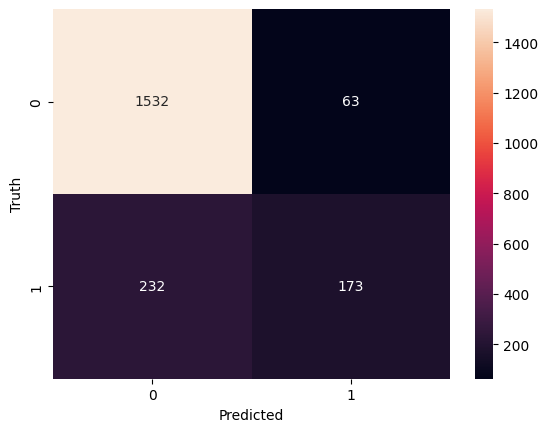

In [36]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy

In [37]:
round((1532+173)/(1532+232+63+173),2)

0.85

Precision for who have not exited (0)

In [43]:
round(1532/(1532+232),2)

0.87

Precision for who have exited (1)

In [41]:
round(173/(63+173),2)

0.73

Recall for those who have not exites (class 0)

In [44]:
round(1532/(1532+63),2)

0.96

Recall for those who have exited (class 1)

In [45]:
round(173/(173+232),2)

0.43